KBR Report 에서 오른쪽 위 표 데이터(현재 승패) 가져와서 출력하기
- http://www.kbreport.com/main

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
url = 'http://www.kbreport.com/main'
url = 'file:///C:/Users/wtime/Downloads/%ED%8C%80%20%ED%83%80%EA%B2%A9%EB%A9%94%EC%9D%B8%EA%B8%B0%EB%A1%9D%20_%20KBReport.html'
tables = pd.read_html(url, index_col=1) #1번째 컬럼이 인덱스다
len(tables)

1

In [43]:
baseball = tables[0]
baseball.shape

(11, 20)

In [46]:
data = baseball.iloc[:-1]

In [96]:
data.head(3)

,#,경기,승,무,패,승률,기대승률,R/G,득점,홈런,도루,볼넷%,삼진%,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
팀명,,,,,,,,,,,,,,,,,,,,
SK,1.0,77,51,1,25,0.671,0.606,4.70,362,69,56,8.5,17.7,0.303,0.263,0.337,0.387,0.724,0.329,8.69
두산,2.0,78,48,0,30,0.615,0.625,5.03,392,47,52,11.3,15.5,0.313,0.273,0.361,0.390,0.751,0.346,14.22
LG,3.0,76,43,1,32,0.573,0.522,4.25,323,48,55,8.1,17.0,0.303,0.260,0.329,0.368,0.697,0.318,5.22


올해 야구 경기별 평균 점수를 구하세요
평균(득점/경기수)

In [158]:
np.mean(data.득점/data.경기)

4.657478475333239

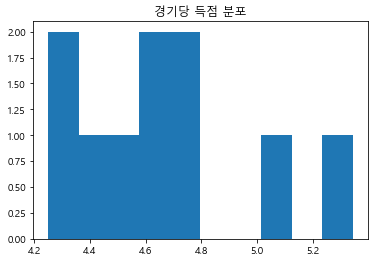

In [109]:
p = plt.title("경기당 득점 분포")
p = plt.hist(data.득점/data.경기, bins=10)

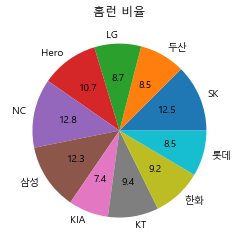

In [103]:
plt.title("홈런 비율")
p = plt.pie(data.홈런, labels=data.index, autopct='%.1f')

In [57]:
#warning 떠서 API 로 대체합니다
#data['승률'] = data['승률'].astype('float') # 타입 변경 후 write
#data['기대승률'] = data['기대승률'].astype('float')
data.loc[:,'승률'] = data['승률'].astype('float') # 타입 변경 후 write
data.loc[:,'기대승률'] = data['기대승률'].astype('float') # 타입 변경 후 write

- 승률를 bar 그래프로 표현하기
- 승률과 홈런의 관계는?
- 팀별 득점 점수
- 승률과 실점
- 나의 홈팀과 가장 유사한 성격의 팀을 찾아라

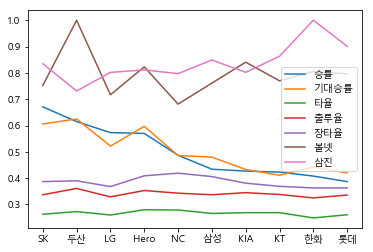

In [95]:
# % 승률, 기대승률,  타율, 출루율, 장타율 
col = ['승률', '기대승률','타율', '출루율', '장타율']
for c in col:
    plt.plot(data.index, data[c], label=c)#
plt.plot(data.index, data['볼넷%']/ data['볼넷%'].max() , label='볼넷')
plt.plot(data.index, data['삼진%']/ data['삼진%'].max() , label='삼진')
plt.legend()

<BarContainer object of 10 artists>

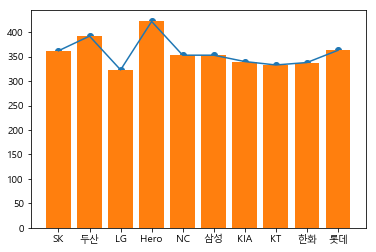

In [86]:
plt.plot(data.index, data['득점'])
plt.scatter(data.index, data['득점'])
plt.bar(data.index, data['득점'])

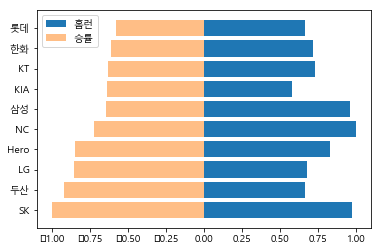

In [82]:
plt.rc('font', family='Malgun Gothic')
plt.barh(data.index, data['홈런']/data['홈런'].max(), label='홈런')
plt.barh(data.index, -data['승률']/data['승률'].max(),alpha=0.5, label='승률') # bar(X, Y)
plt.legend()

In [110]:
name = input("홈팀을 말하세요 ")
name

홈팀을 말하세요KT


'KT'

In [119]:
#정규화
data_normal = data/data.max()
data_normal.head()

,#,경기,승,무,패,승률,기대승률,R/G,득점,홈런,도루,볼넷%,삼진%,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
팀명,,,,,,,,,,,,,,,,,,,,
SK,0.1,0.974684,1.000000,1.0,0.543478,1.000000,0.9696,0.880150,0.857820,0.971831,0.835821,0.752212,0.834906,0.929448,0.939286,0.933518,0.923628,0.950131,0.950867,0.602218
두산,0.2,0.987342,0.941176,0.0,0.652174,0.916542,1.0000,0.941948,0.928910,0.661972,0.776119,1.000000,0.731132,0.960123,0.975000,1.000000,0.930788,0.985564,1.000000,0.985447
LG,0.3,0.962025,0.843137,1.0,0.695652,0.853949,0.8352,0.795880,0.765403,0.676056,0.820896,0.716814,0.801887,0.929448,0.928571,0.911357,0.878282,0.914698,0.919075,0.361746
Hero,0.4,1.000000,0.882353,0.0,0.739130,0.849478,0.9552,1.000000,1.000000,0.830986,0.850746,0.823009,0.811321,1.000000,1.000000,0.977839,0.976134,1.000000,1.000000,1.000000
NC,0.5,0.962025,0.725490,0.0,0.847826,0.725782,0.7776,0.868914,0.836493,1.000000,0.552239,0.681416,0.797170,0.975460,0.996429,0.950139,1.000000,1.000000,0.988439,0.811504


In [ ]:
[100, 1 ] 
#A[110, 8]  오차 10 + 7 = 17
#B[120, 2]  오차 20 + 1 = 21

In [146]:
home = data_normal.loc[name]
#홈팀과 다른팀과의 차이, 차이의 합이 작은 팀들을 찾습니다
차이 = np.sum( np.square(data_normal - home), axis=1)

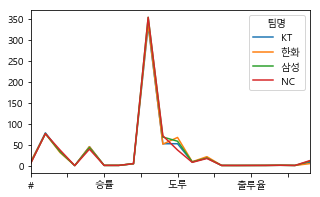

In [153]:
i = 차이.sort_values().index[:4]
data.loc[i].T.plot(figsize=(5,3))
#data.loc[i,['홈런','득점','승']].T.plot(figsize=(5,3))

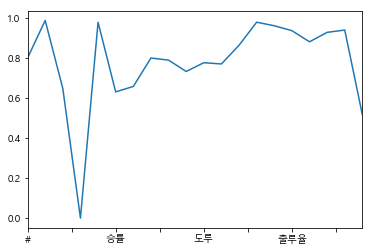

In [126]:
home.plot()